In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
import statistics as st
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DS1_C6_S1_BankChurn_Data_Concept.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
df.shape

(10127, 19)

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

In [6]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [7]:
100*(df.isnull().sum()/df.shape[0])

CLIENTNUM                   0.000000
Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.918337
Dependent_count             0.000000
Education_Level             0.000000
Marital_Status              0.000000
Income_Category             0.000000
Card_Category               1.303446
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.592476
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
   

In [9]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [29]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [5]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


# Q1 (Genderwise count of customers who are with the bank and those who have left.)

In [102]:
info_of_cat("Attrition_Flag")

Unique values in Attrition_Flag are: ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


In [103]:
info_of_cat('Gender')

Unique values in Gender are: ['M' 'F']
Mode of Gender is F
Number of missing values in Gender is 0


In [104]:
Gender_mode=df.Gender.mode()[0]
print(Gender_mode)
df['Gender'].fillna(Gender_mode, inplace=True)

F


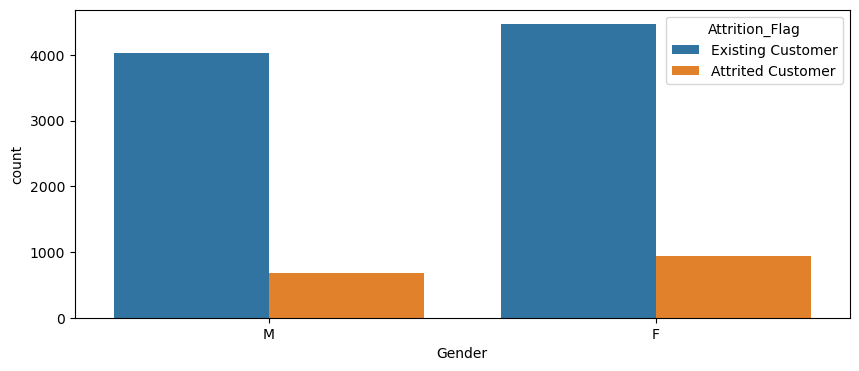

In [99]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='Gender',hue='Attrition_Flag');

#conclusion:- more no.of females customers had left the bank and with bank.

# Q2 (2. Is there a connection between the education level and the customers who have left the bank?)

In [52]:
info_of_cat('Education_Level')

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


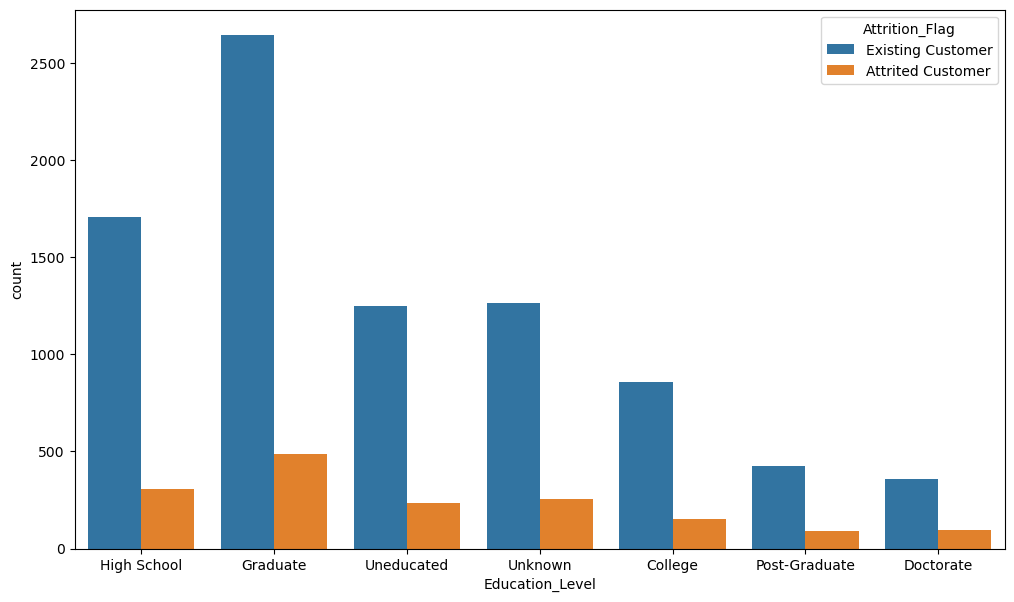

In [116]:
plt.figure(figsize=(12,7))
sb.countplot(data=df,x='Education_Level',hue='Attrition_Flag');

#conclusion:- more no.of Graduate customers have left the bank.

# Q3 (3. Marital Status analysis of those customers who have left the bank)

In [53]:
info_of_cat('Marital_Status')

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


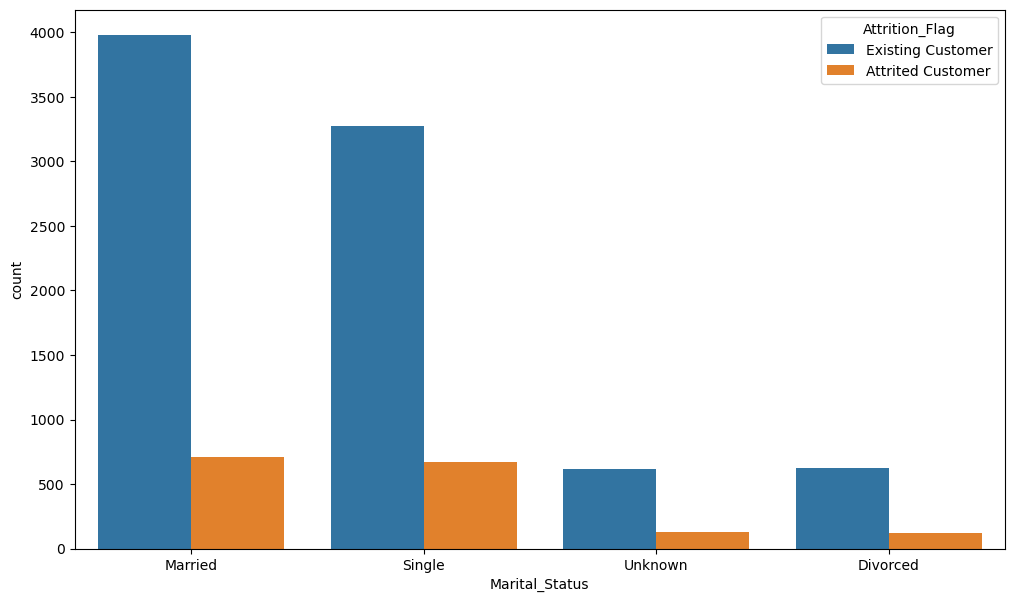

In [30]:
plt.figure(figsize=(12,7))
sb.countplot(data=df,x=df['Marital_Status'],hue=df['Attrition_Flag']);

#conclusion:- married people's are left the bank.

# Q4 (4. Income category analysis of the customers who have left the bank)

In [54]:
info_of_cat('Income_Category')

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


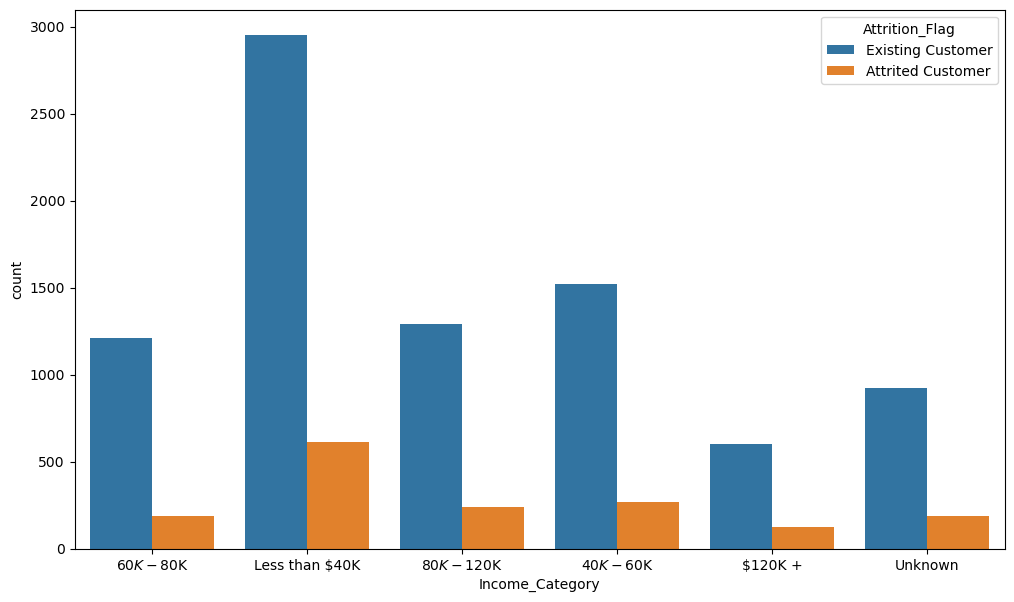

In [29]:
plt.figure(figsize=(12,7))
sb.countplot(data=df,x=df['Income_Category'],hue=df['Attrition_Flag']);

#conclusion:- less than $40k customers have left the bank.

# Q5 (5. Card category analysis of the customers who have left the bank)

In [55]:
info_of_cat('Card_Category')

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132


In [62]:
Card_Category_mode=df.Card_Category.mode()[0]
print(Card_Category_mode)
df['Card_Category'].fillna(Card_Category_mode, inplace=True)

Blue


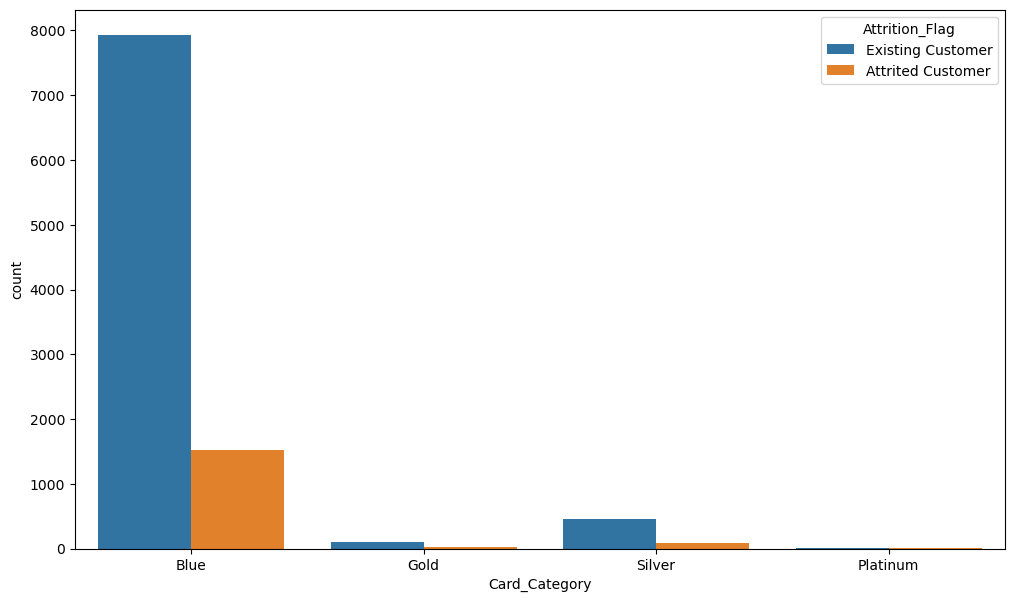

In [64]:
plt.figure(figsize=(12,7))
sb.countplot(data=df,x=df['Card_Category'],hue=df['Attrition_Flag']);

#conclusion:-Manjority of Blue customers have left the bank.

# Q6 (6. Is there any relation between months inactive and churn?)

In [27]:
info_of_numerical('Months_Inactive_12_mon')

The mean of the Months_Inactive_12_mon is 2.3411671768539546
The median of the Months_Inactive_12_mon is 2.0
The mode of the Months_Inactive_12_mon is 3
The standard deviation of the Months_Inactive_12_mon is 1.0106223994182562
Number of missing values in the Months_Inactive_12_mon is 0


<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

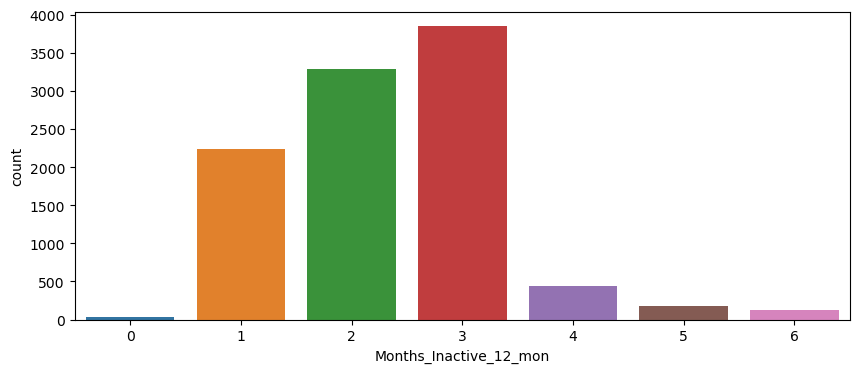

In [118]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Months_Inactive_12_mon'])

#conclusion:-Majority of the customers are inactive for 3 months.

# Q7 (7. Is there any relation between churn and relationship count?)

In [23]:
info_of_cat('Total_Relationship_Count')

Unique values in Total_Relationship_Count are: [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

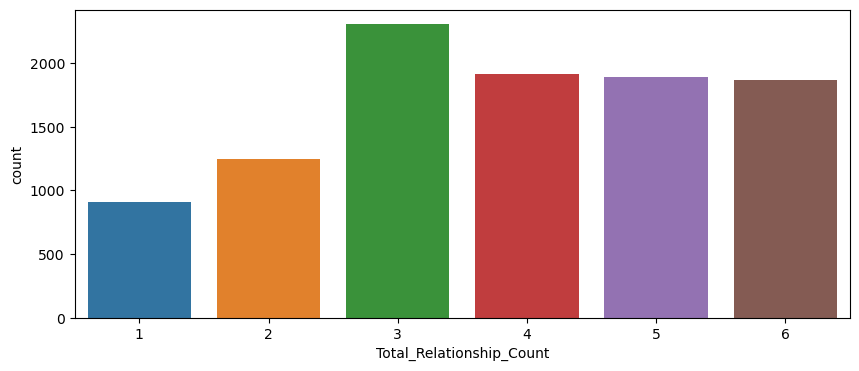

In [120]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Total_Relationship_Count'])

#conclusion:- people have 3 years of relationship with the bank. 20% of the poepole's tend to leave in the first two years.

<AxesSubplot:xlabel='Total_Relationship_Count'>

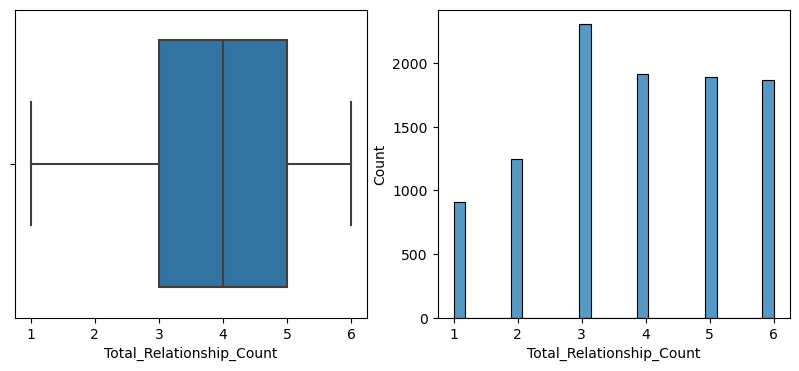

In [36]:
fig, ax=plt.subplots(1,2, figsize=(10,4))
sb.histplot(df['Total_Relationship_Count'], ax=ax[1])
sb.boxplot(x=df['Total_Relationship_Count'], ax=ax[0])

# Q8 (8. Is there any relation between churn and contacts count?)

In [39]:
info_of_numerical('Contacts_Count_12_mon')

The mean of the Contacts_Count_12_mon is 2.4553174681544387
The median of the Contacts_Count_12_mon is 2.0
The mode of the Contacts_Count_12_mon is 3
The standard deviation of the Contacts_Count_12_mon is 1.1062251426358938
Number of missing values in the Contacts_Count_12_mon is 0


<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

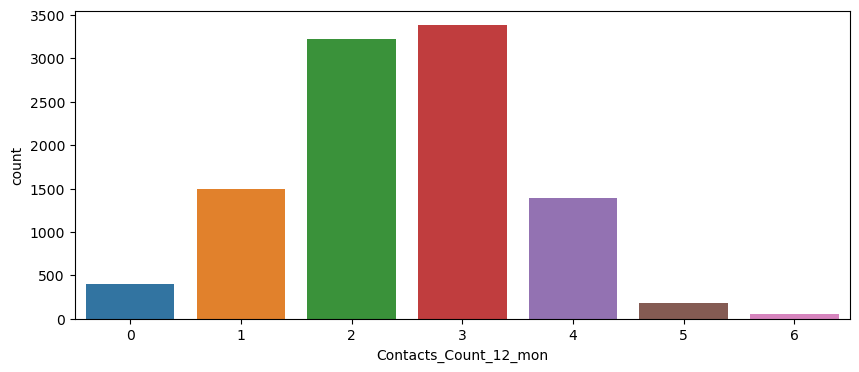

In [140]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Contacts_Count_12_mon'])



#conclusion:- people have left the bank of 2nd month and 3rd month.

# Q9 (9. Is there a relation between the attrition and the age of customers who have a lower utilization ratio?)

In [87]:
info_of_cat('Customer_Age')

Unique values in Customer_Age are: [ 45  49  51  40  44  32  37  48  42  65  56  35  57  41  61  47  62  54
  59  63  53  58  55  66  50  38  46  52 177  39 187  43  64  68 114  67
  60 213  73  70  36  74  34 192 100 160  33  26 181 135  98  29  30  31
 203  28  27 143 134 173 175 163 222  95  88 136 115 193  97 140 120 161
 188  80  94 131 166 107 167 209 199  78 116 219 172 155 146 200 158 109
 159 152 185 174 179 101 154 128  85 110 121 138  86 127 196 112 147 168
  83  89 189 220 133 178 130 137 118 212 123 176  90 145]
Mode of Customer_Age is 44
Number of missing values in Customer_Age is 0


In [88]:
mean=int(df.Customer_Age.mean())
n=df[df['Customer_Age']>75].index
for index in n:
    df.loc[index, 'Customer_Age']=mean

In [89]:
z=df[(df['Avg_Utilization_Ratio']<0.5)]
z

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,14596,120,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


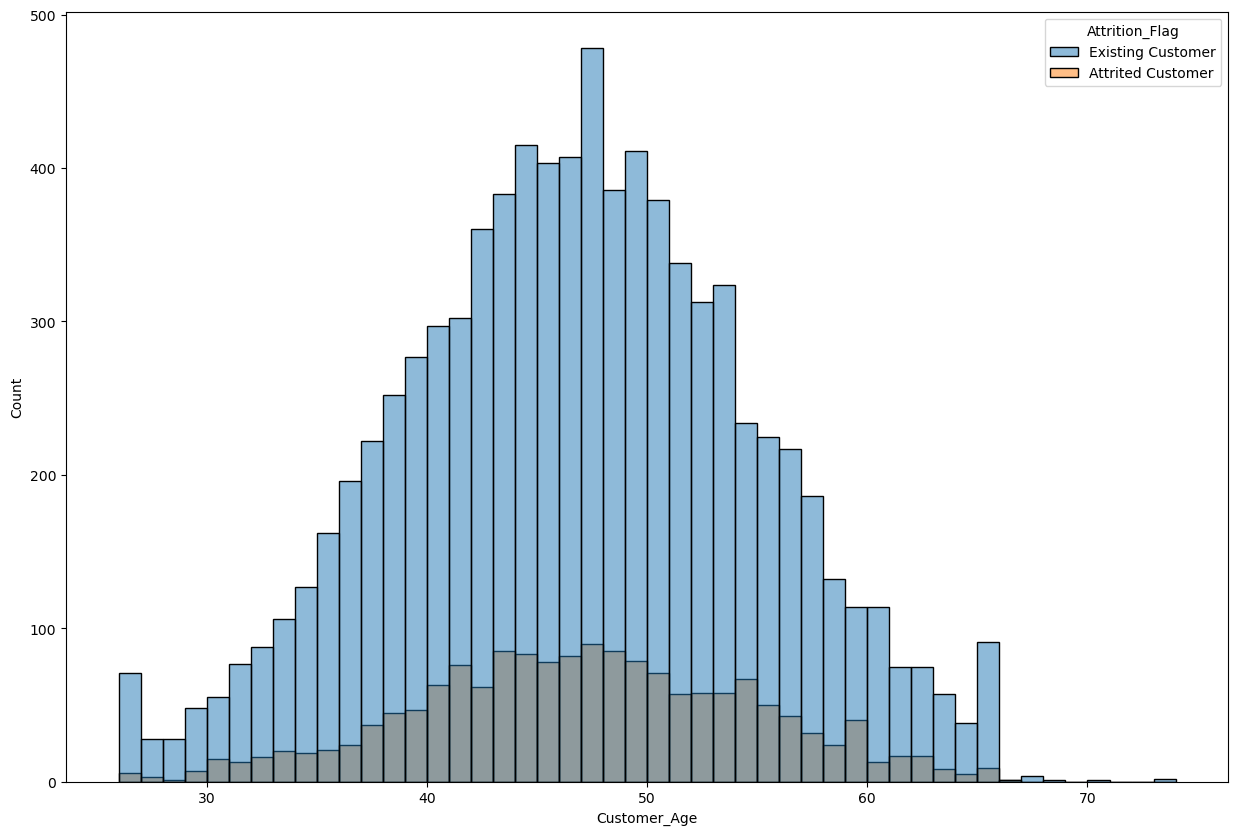

In [91]:
plt.figure(figsize=(15,10))
sb.histplot(data=z,x=df['Customer_Age'],hue=df['Attrition_Flag']);

# Q10 (10. Analysis of marital status and utilization ratio of the customers who are leaving out the bank versus those who are still with the bank.)

In [56]:
info_of_cat('Marital_Status')

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


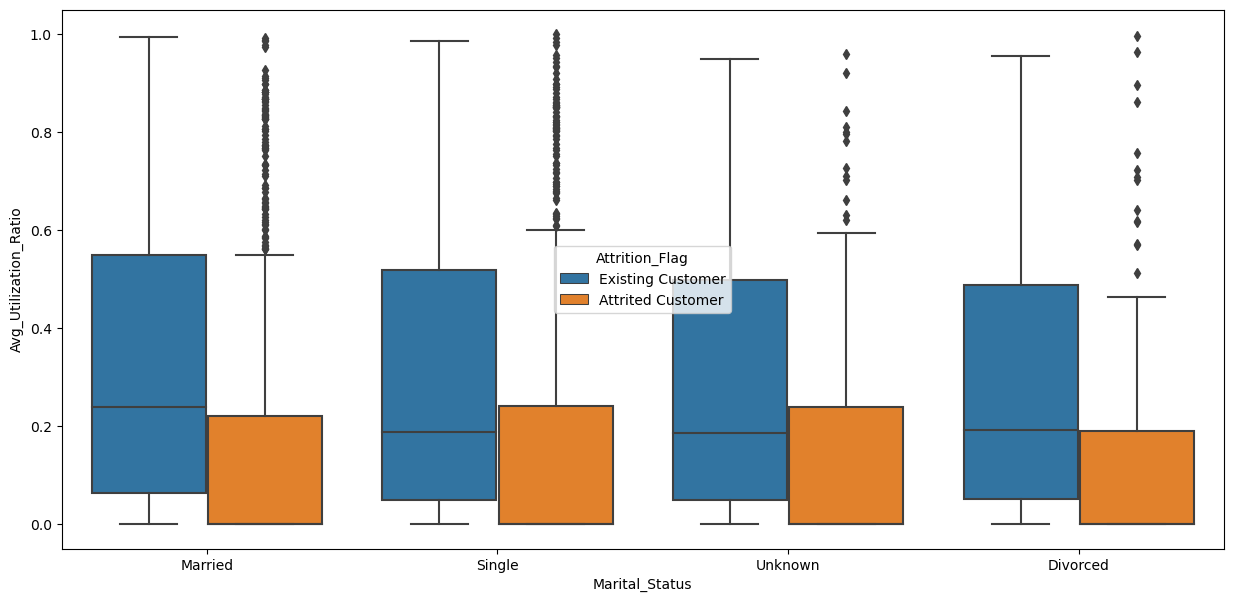

In [146]:
plt.figure(figsize=(15,7))
sb.boxplot(data=df,x='Marital_Status',y='Avg_Utilization_Ratio',hue=df['Attrition_Flag']);

#conclusion:-  more no.of Divorced customer's had left the bank and with bank.

# Q11 (11. Is there a relation between the credit limit offered to the customers (having a lower utilization ratio) compared to those who are having a higher utilization ratio?)

In [63]:
info_of_numerical('Credit_Limit')

The mean of the Credit_Limit is 8703.180550312796
The median of the Credit_Limit is 4557.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9190.058901949453
Number of missing values in the Credit_Limit is 60


In [65]:
Credit_Limit=df.Credit_Limit.mode()[0]
print(Credit_Limit)
df['Credit_Limit'].fillna(Credit_Limit, inplace=True)

34516.0


<AxesSubplot:xlabel='Credit_Limit'>

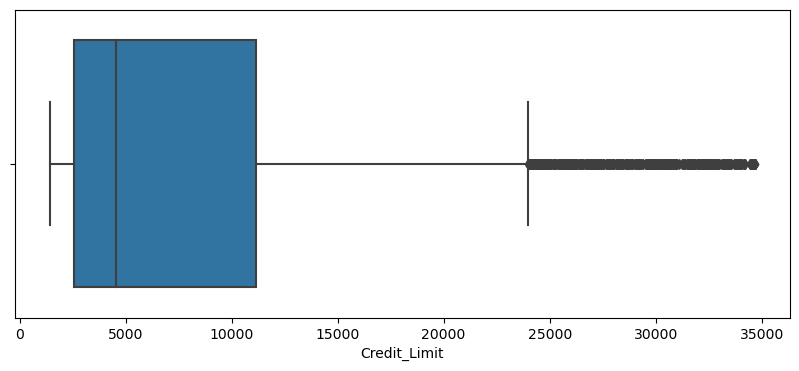

In [97]:
plt.figure(figsize=(10,4))
sb.boxplot(data=df, x=df['Credit_Limit'],hue=df['Avg_Utilization_Ratio'])

#conclusion:- lower utilisation ration have higher credit limit whereas with higher utilisation ration customers have lower.

In [62]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

# Repeat the same analysis with customers who are still with the bank.

# Q1 (1. Is there a connection between the education level and the existing customers?)

In [29]:
info_of_cat('Education_Level')

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


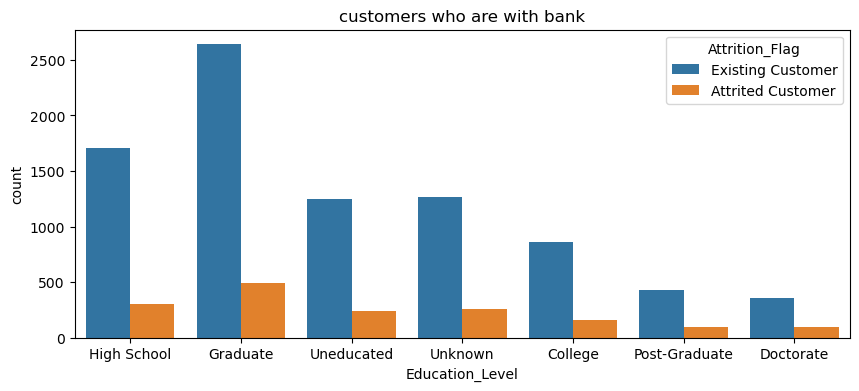

In [26]:
plt.figure(figsize=(10,4))
plt.title('customers who are with bank')
sb.countplot(data=df, x=df['Education_Level'],hue=df['Attrition_Flag']);



#conclusion:- Graduate are existing customers in the bank.

# Q2 (2. Marital Status analysis of those customers who are with the bank)

In [31]:
info_of_cat('Marital_Status')

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


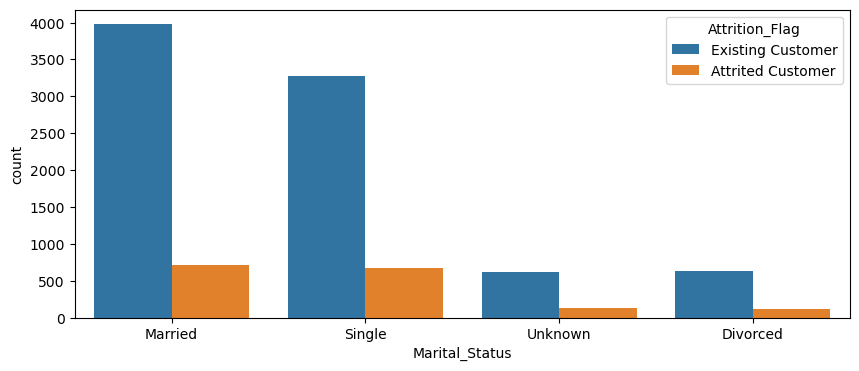

In [35]:
plt.figure(figsize=(10,4))
sb.countplot(data=df, x=df['Marital_Status'], hue=df['Attrition_Flag']);

#conclusion:- married people's are with the bank.

# Q3 ( Income category analysis of customers who are with the bank)


In [37]:
info_of_cat('Income_Category')

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


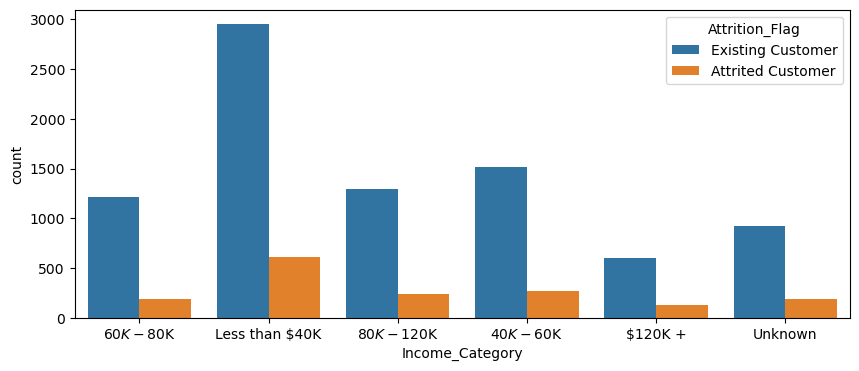

In [38]:
plt.figure(figsize=(10,4))
sb.countplot(data=df, x=df['Income_Category'], hue=df['Attrition_Flag']);

#conclusion:- less than $40k customers are with the bank.

# Q4 ( Card category analysis of the customers who are still with the bank)


In [33]:
info_of_cat('Card_Category')

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132


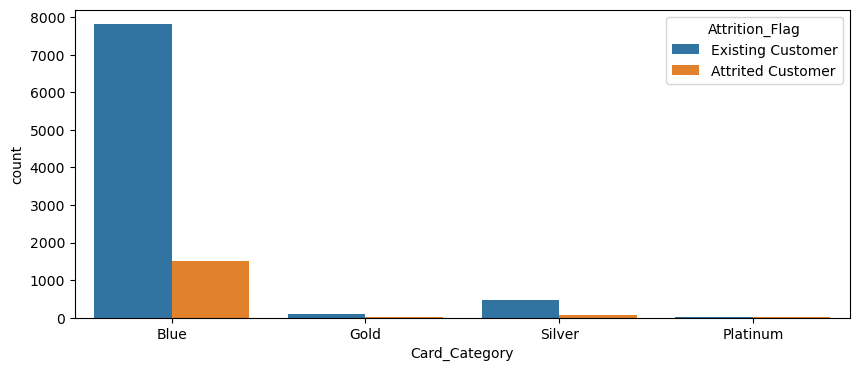

In [36]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Card_Category'],hue=df['Attrition_Flag']);

#conclusion:- Blue customer's are still with the bank.

# Q5  Is there any relation between months inactive and existing customers?)


In [43]:
info_of_numerical('Months_Inactive_12_mon')

The mean of the Months_Inactive_12_mon is 2.3411671768539546
The median of the Months_Inactive_12_mon is 2.0
The mode of the Months_Inactive_12_mon is 3
The standard deviation of the Months_Inactive_12_mon is 1.0106223994182562
Number of missing values in the Months_Inactive_12_mon is 0


<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

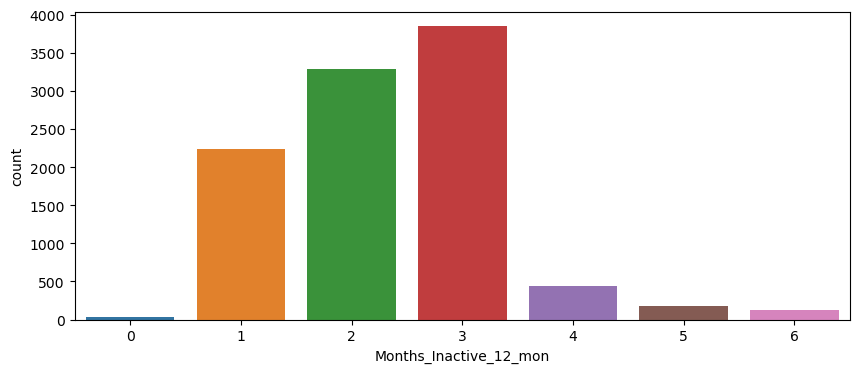

In [155]:
plt.figure(figsize=(10,4))
sb.countplot(data=df, x=df['Months_Inactive_12_mon'])

#conclusion:-Majority of the existing customers are inactive for 3 months.

# Q6 (6. Is there any relation between existing customers and relationship count?)

In [45]:
info_of_numerical('Total_Relationship_Count')

The mean of the Total_Relationship_Count is 3.8125802310654686
The median of the Total_Relationship_Count is 4.0
The mode of the Total_Relationship_Count is 3
The standard deviation of the Total_Relationship_Count is 1.5544078653388382
Number of missing values in the Total_Relationship_Count is 0


<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

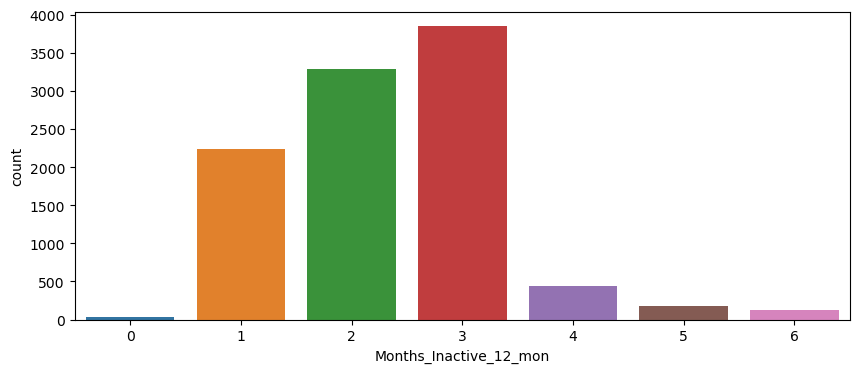

In [154]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Months_Inactive_12_mon'])


#conclusion:- people have 3 years of relationship with the bank. 20% of the poepole's existing customers in the first two years.

# Q7 (7. Is there any relation between existing customers and contacts count?)

In [150]:
info_of_numerical('Contacts_Count_12_mon')

The mean of the Contacts_Count_12_mon is 2.4553174681544387
The median of the Contacts_Count_12_mon is 2.0
The mode of the Contacts_Count_12_mon is 3
The standard deviation of the Contacts_Count_12_mon is 1.1062251426358938
Number of missing values in the Contacts_Count_12_mon is 0


<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

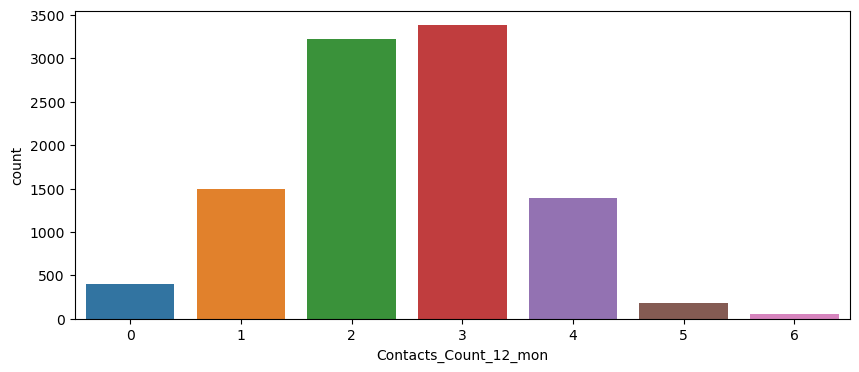

In [153]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Contacts_Count_12_mon'])

#conclusion:- people of extisting customers the bank of 2nd month and 3rd month.

# part3 

# Q1(Present the details of Total Transaction Amount of existing customers who are high school pass outs.)

In [11]:
info_of_cat('Education_Level') 

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


In [10]:
info_of_numerical('Total_Trans_Amt')

The mean of the Total_Trans_Amt is 4404.086303939963
The median of the Total_Trans_Amt is 3899.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3397.129253557085
Number of missing values in the Total_Trans_Amt is 0


In [45]:
x=df[(df['Education_Level']=='High School') | (df["Attrition_Flag"] == "Existing Customer")]
x

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,17498,111,0.106
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,15577,114,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,14596,120,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462


<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

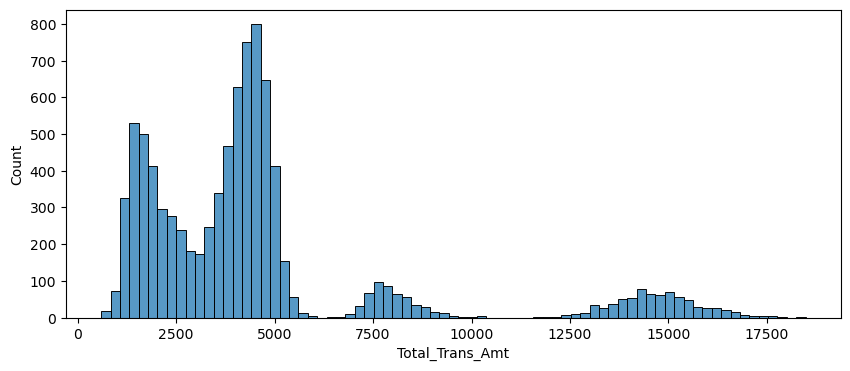

In [50]:
plt.figure(figsize=(10,4))
sb.histplot(data=x,x=x['Total_Trans_Amt'])

#conclusion:- Total Transaction Amount of existing customers 4000-5000 are high school pass outs.

# Q2 ( Analysis of the education level of the customers who are with the bank and those who left)

In [73]:
info_of_cat('Education_Level')

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

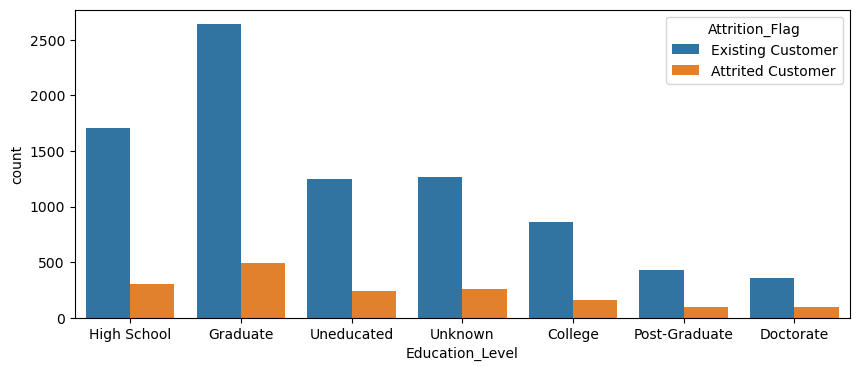

In [75]:
plt.figure(figsize=(10,4))
sb.countplot(data=df, x=df['Education_Level'],hue=df['Attrition_Flag'])

#conclusion:- more no.of Graduate people's are with the bank and they left the bank.

# Q3 (Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing)

In [30]:
info_of_numerical('Total_Trans_Amt')

The mean of the Total_Trans_Amt is 4404.086303939963
The median of the Total_Trans_Amt is 3899.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3397.129253557085
Number of missing values in the Total_Trans_Amt is 0


In [32]:
#method1
print('mean of Existing customer', df[(df['Attrition_Flag']=='Existing Customer')]['Total_Trans_Amt'].mean())
print('medain of Existing customer', df[(df['Attrition_Flag']=='Existing Customer')]['Total_Trans_Amt'].median())
print('mode of Existing customer', df[(df['Attrition_Flag']=='Existing Customer')]['Total_Trans_Amt'].mode()[0])

mean of Existing customer 4654.655882352941
medain of Existing customer 4100.0
mode of Existing customer 4253


In [33]:
print('mean of Attrited Customer', df[(df['Attrition_Flag']=='Attrited Customer')]['Total_Trans_Amt'].mean())
print('medain of Attrited Customerr', df[(df['Attrition_Flag']=='Attrited Customer')]['Total_Trans_Amt'].median())
print('mode of Attrited Customer', df[(df['Attrition_Flag']=='Attrited Customer')]['Total_Trans_Amt'].mode()[0])

mean of Attrited Customer 3095.025814382299
medain of Attrited Customerr 2329.0
mode of Attrited Customer 2108


In [69]:
#method2
df.groupby(['Attrition_Flag'])['Total_Trans_Amt'].agg(['mean','median'])

,mean,median
Attrition_Flag,,
Attrited Customer,3095.025814,2329.0
Existing Customer,4654.655882,4100.0


#The mode of the Total_Trans_Amt is 4253

#conclusion:- Attrition_flag of Existing customers and Attrited Customer are high in mean.

# Q4 ( What is the average utilization ratio of the existing customers?)

In [86]:
info_of_numerical('Avg_Utilization_Ratio')

The mean of the Avg_Utilization_Ratio is 0.2748935518909845
The median of the Avg_Utilization_Ratio is 0.176
The mode of the Avg_Utilization_Ratio is 0.0
The standard deviation of the Avg_Utilization_Ratio is 0.2756914692523933
Number of missing values in the Avg_Utilization_Ratio is 0


In [51]:
z=df[(df['Attrition_Flag']=='Existing Customer')]

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

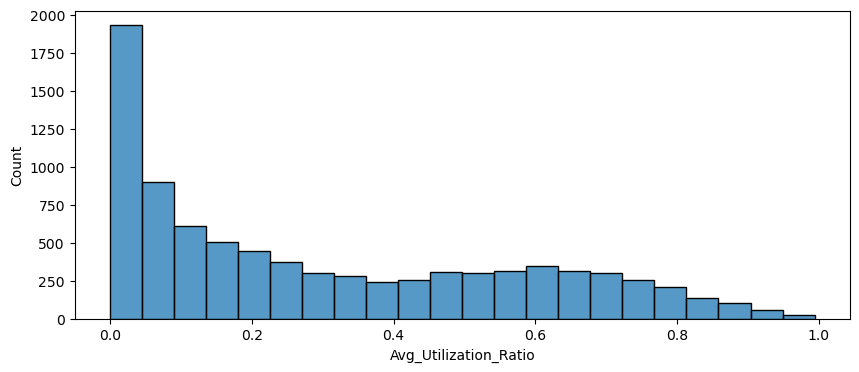

In [52]:
plt.figure(figsize=(10,4))
sb.histplot(data=z, x=z['Avg_Utilization_Ratio'])

#conclusion:- The Majority of average utilization ratio of the existing customers.

# Q5 (13. Analysis of the churned out customers who hold the blue card with respect to their income categories)

In [56]:
info_of_cat('Income_Category')

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


In [57]:
y=df[(df['Attrition_Flag']==' Attrited Customer') & (df['Card_Category']=='Blue')]

<AxesSubplot:xlabel='Income_Category', ylabel='Count'>

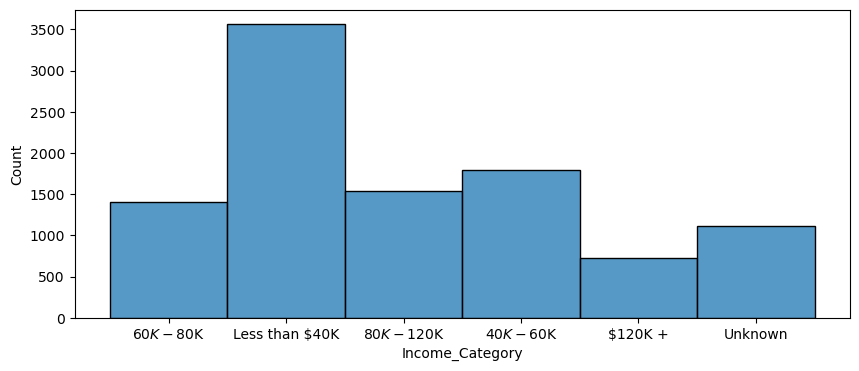

In [59]:
plt.figure(figsize=(10,4))
sb.histplot(data=y, x=df['Income_Category'])

#conclusion:-less than 40k churned customers are hold the blue card.

# Q6 ( Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers)

In [34]:
info_of_numerical('Total_Trans_Amt')

The mean of the Total_Trans_Amt is 4404.086303939963
The median of the Total_Trans_Amt is 3899.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3397.129253557085
Number of missing values in the Total_Trans_Amt is 0


In [36]:
print('mean of Existing customer', df[(df['Attrition_Flag']=='Existing Customer')]['Total_Trans_Amt'].mean())

mean of Existing customer 4654.655882352941


In [73]:
df.groupby(['Attrition_Flag','Card_Category'])['Total_Trans_Amt'].agg(['mean','median'])

mean  median
Attrition_Flag    Card_Category                      
Attrited Customer Blue            2942.893404  2314.0
                  Gold            5841.809524  6782.0
                  Platinum        4755.800000  4758.0
                  Silver          4878.525000  4753.0
Existing Customer Blue            4473.625160  4087.0
                  Gold            8093.189474  7690.0
                  Platinum       10414.400000  8888.0
                  Silver          6948.627155  4281.0

#The mode of the Total_Trans_Amt is 4253

#conclusion:- transaction amount (mean, median, mode) for blue card customers high in Existing customers.

# Q7 ( How is the credit limit of the blue card customers affecting the churn?)

In [37]:
info_of_numerical('Credit_Limit')

The mean of the Credit_Limit is 8703.180550312796
The median of the Credit_Limit is 4557.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9190.058901949453
Number of missing values in the Credit_Limit is 60


In [42]:
m=df[(df['Attrition_Flag']=='Attrited Customer') & (df['Card_Category']=='Blue')]
m

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,692,16,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,704,16,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,705,19,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,602,15,0.000
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,2,4,3,2158.0,0,2158.0,615,12,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,10310,63,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,6009,53,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000


<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

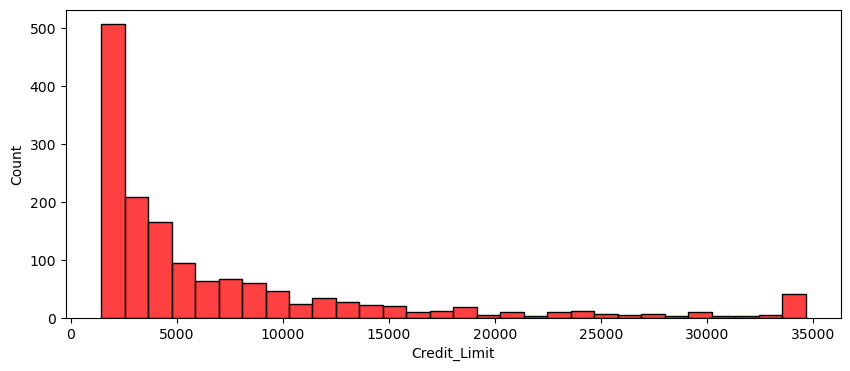

In [44]:
plt.figure(figsize=(10,4))
bins=[5000,10000,15000,20000,25000,30000,35000]
labels=['5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
x=pd.cut(df['Credit_Limit'],bins=bins,labels=labels)
sb.histplot(data=m,x=m['Credit_Limit'],color='r')

#conclusion:- Majority of people's of credit limit of customers affecting the churn of blue card.

# Q8 ( Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services)

In [6]:
info_of_numerical('Dependent_count')

The mean of the Dependent_count is 2.7874000197491853
The median of the Dependent_count is 2.0
The mode of the Dependent_count is 3
The standard deviation of the Dependent_count is 6.479134929706418
Number of missing values in the Dependent_count is 0


In [8]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

In [11]:
a=df[(df['Months_Inactive_12_mon']==0) & (df['Attrition_Flag']=='Attrited Customer')]

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

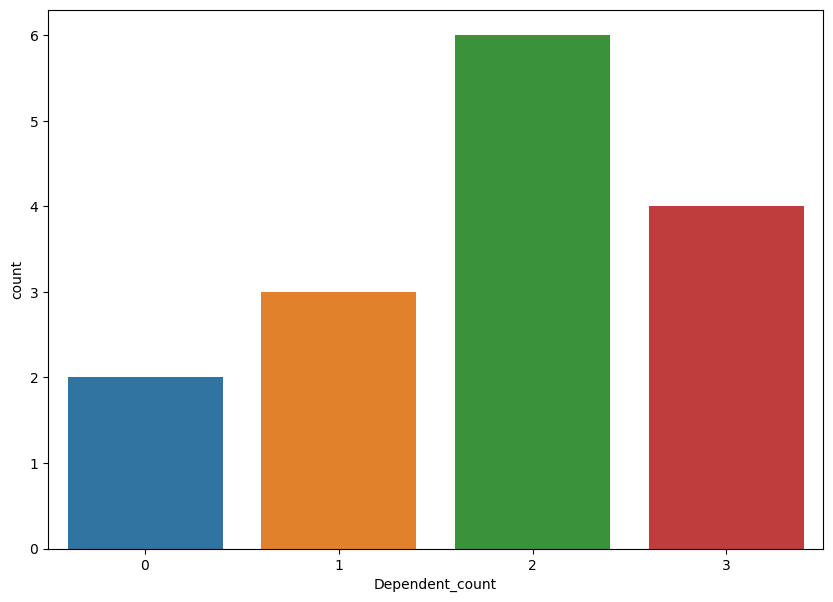

In [12]:
plt.figure(figsize=(10,7))
sb.countplot(data=a, x=a['Dependent_count'])

#conclusion:-  The customers who have 2 dependents are usually high.

# Q9 (Is there a relation between the credit limit and the attrition of the customers?)

In [104]:
info_of_numerical('Credit_Limit')

The mean of the Credit_Limit is 8856.115196998016
The median of the Credit_Limit is 4597.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9374.508947187947
Number of missing values in the Credit_Limit is 0


<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

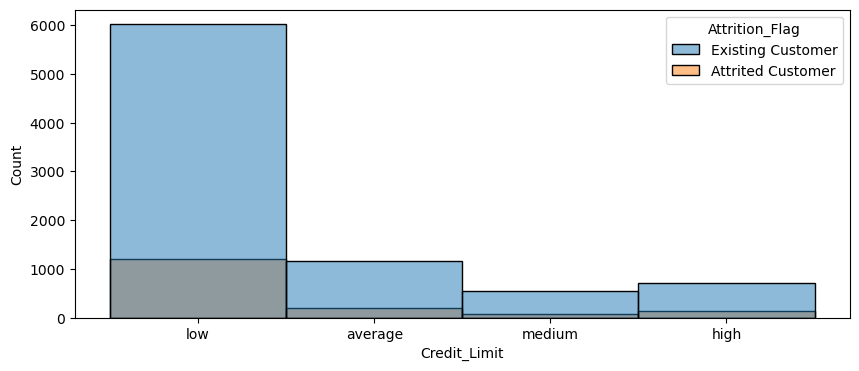

In [16]:
plt.figure(figsize=(10,4))
labels=['low','average','medium','high']
x=pd.cut(df['Credit_Limit'],bins=4,labels=labels)
sb.histplot(x=x,hue=df['Attrition_Flag'])

#conclusion:- a relation between the credit limit and the attrition of the customers are very low crediti.

# Q10 (What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.))

In [19]:
info_of_numerical('Customer_Age')

The mean of the Customer_Age is 47.285276982324476
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44
The standard deviation of the Customer_Age is 13.270923260536502
Number of missing values in the Customer_Age is 0


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

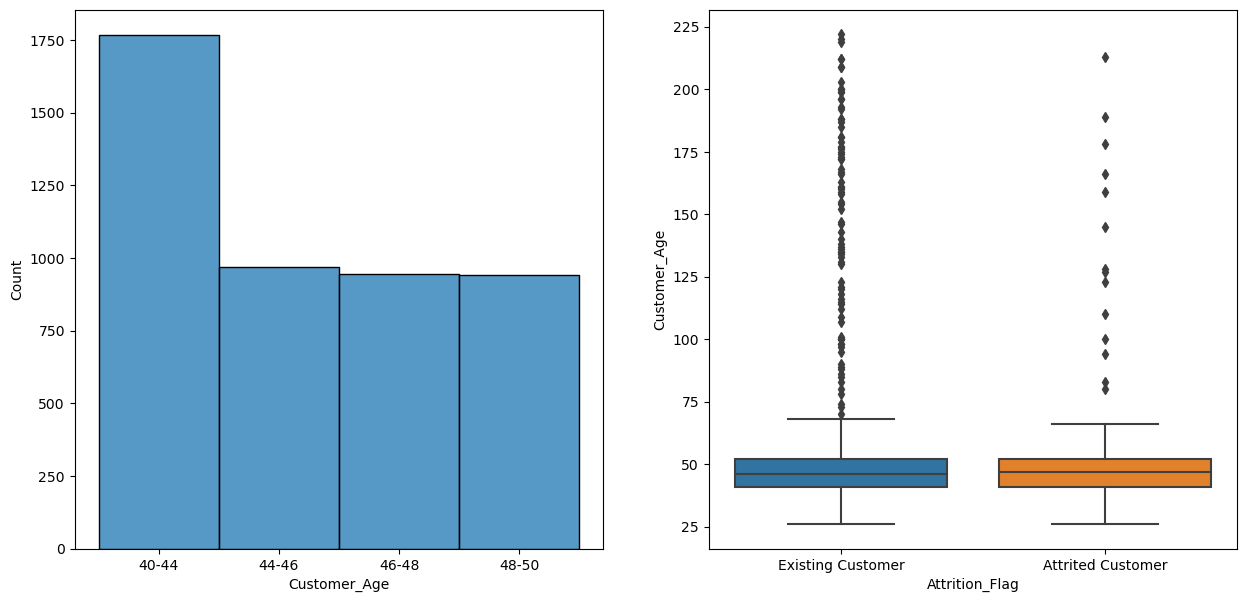

In [36]:
fig, ax, =plt.subplots(1, 2, figsize=(15,7))
bins=[40,44,46,48,50]
labels=['40-44','44-46','46-48','48-50']
x=pd.cut(x=df['Customer_Age'],bins=bins,labels=labels)
sb.histplot(x=x,ax=ax[0])
sb.boxplot(y=df['Customer_Age'],x=df['Attrition_Flag'],ax=ax[1])

conclusion:- The average utilization ratio of the credit card for each age sub-group between 40-50 . the sub-group of customer-age is high in 40-40 age.

# Q11.( How are the education level and income category affecting the customer churn?)

In [67]:
info_of_cat('Education_Level')

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


In [68]:
info_of_cat('Attrition_Flag')

Unique values in Attrition_Flag are: ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


In [70]:
info_of_cat('Income_Category')

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


In [11]:
m=df[(df['Attrition_Flag']=='Attrited Customer')]

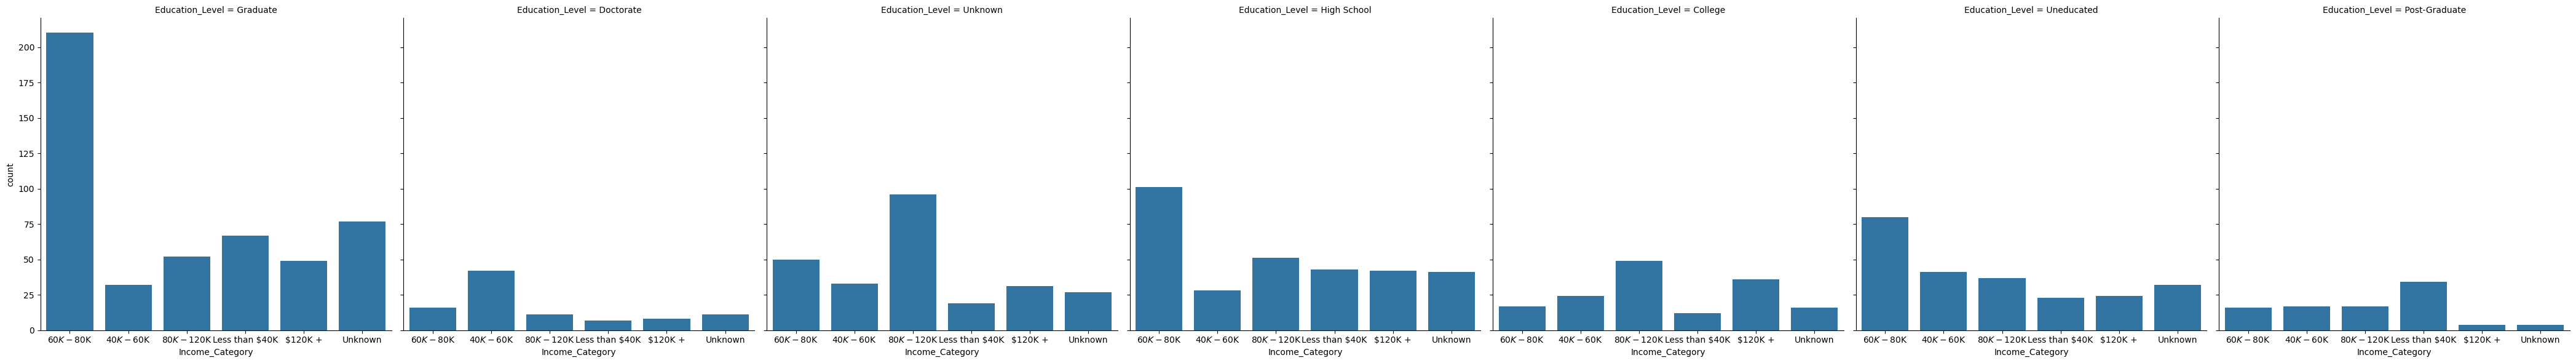

In [14]:
p=sb.FacetGrid(m,col='Education_Level',height=6)
p.map(sb.countplot,'Income_Category')
plt.show()

# Q12.( Identify the churned out customers with high income category, high education level, and high credit limit.)


In [23]:
info_of_cat('Income_Category')

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


In [31]:
info_of_cat('Education_Level')

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


In [32]:
info_of_numerical('Credit_Limit')

The mean of the Credit_Limit is 8703.180550312796
The median of the Credit_Limit is 4557.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9190.058901949453
Number of missing values in the Credit_Limit is 60


In [118]:
df[(df['Attrition_Flag']=='Attrited Customer') & (df['Education_Level']=='Doctorate') & (df['Income_Category']=='$120K +') & (df['Credit_Limit']>=30984)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
6861,808747233,Attrited Customer,50,M,2,Doctorate,Married,$120K +,Silver,45,6,3,3,34516.0,0,34516.0,2573,55,0.000
9846,758753283,Attrited Customer,52,M,3,Doctorate,Married,$120K +,Blue,45,1,3,3,34516.0,550,33966.0,7341,71,0.016
